In [6]:
import numpy as np
import pandas as pd

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor

from sklearn.metrics import accuracy_score

from sklearn import tree
import graphviz

import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

# Load Dataset

In [7]:
# IRIS Plants Dataset
skdata = datasets.load_iris()

# Breast Cancer Dataset
# skdata = datasets.load_breast_cancer()

# Digits Dataset
# skdata = datasets.load_digits()

# Wine Dataset
# skdata = datasets.load_wine()

# Hayes-Roth Data Set: https://archive.ics.uci.edu/ml/datasets/Hayes-Roth
# df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/hayes-roth/hayes-roth.data', header=None)
# ndf = df.iloc[:, 1:] # Remove first column of user names
# x, y = ndf.iloc[:, :-1], np.array(ndf.iloc[:, -1]) # Split dataframe into data and target columns

# Standard Scaling
# x = StandardScaler().fit_transform(skdata.data)
# y = skdata.target

# MinMax Scaling
# x = MinMaxScaler().fit_transform(skdata.data)
# y = skdata.target

# x = skdata.data
# y = skdata.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=56)

print('Train Data - ', x_train.shape, y_train.shape)
print('Test Data  - ', x_test.shape, y_test.shape)

Train Data -  (92, 4) (92,)
Test Data  -  (40, 4) (40,)


# Random Forest

In [8]:
# Train the Random Forest model
# criterion = 'gini' or 'entropy'
rf = RandomForestClassifier(n_estimators=100, criterion='gini').fit(x_train, y_train)
y_pred = rf.predict(x_test)

# rf = RandomForestRegressor().fit(x_train, y_train)
# y_pred = np.round(rf.predict(x_test))

print('Test - ', y_test)
print('Pred - ', y_pred)

print('Accuracy - ', accuracy_score(y_test, y_pred))

Test -  [3 3 2 3 2 1 2 2 1 2 1 2 1 1 3 1 2 3 2 2 2 1 1 1 3 2 1 3 2 1 2 3 1 2 2 2 2
 1 1 1]
Pred -  [3 3 1 3 2 1 2 1 2 1 2 2 1 2 3 1 2 3 2 2 1 1 1 2 3 2 1 3 2 2 2 3 1 2 2 1 2
 2 1 2]
Accuracy -  0.7


Total RF Estimators -  100


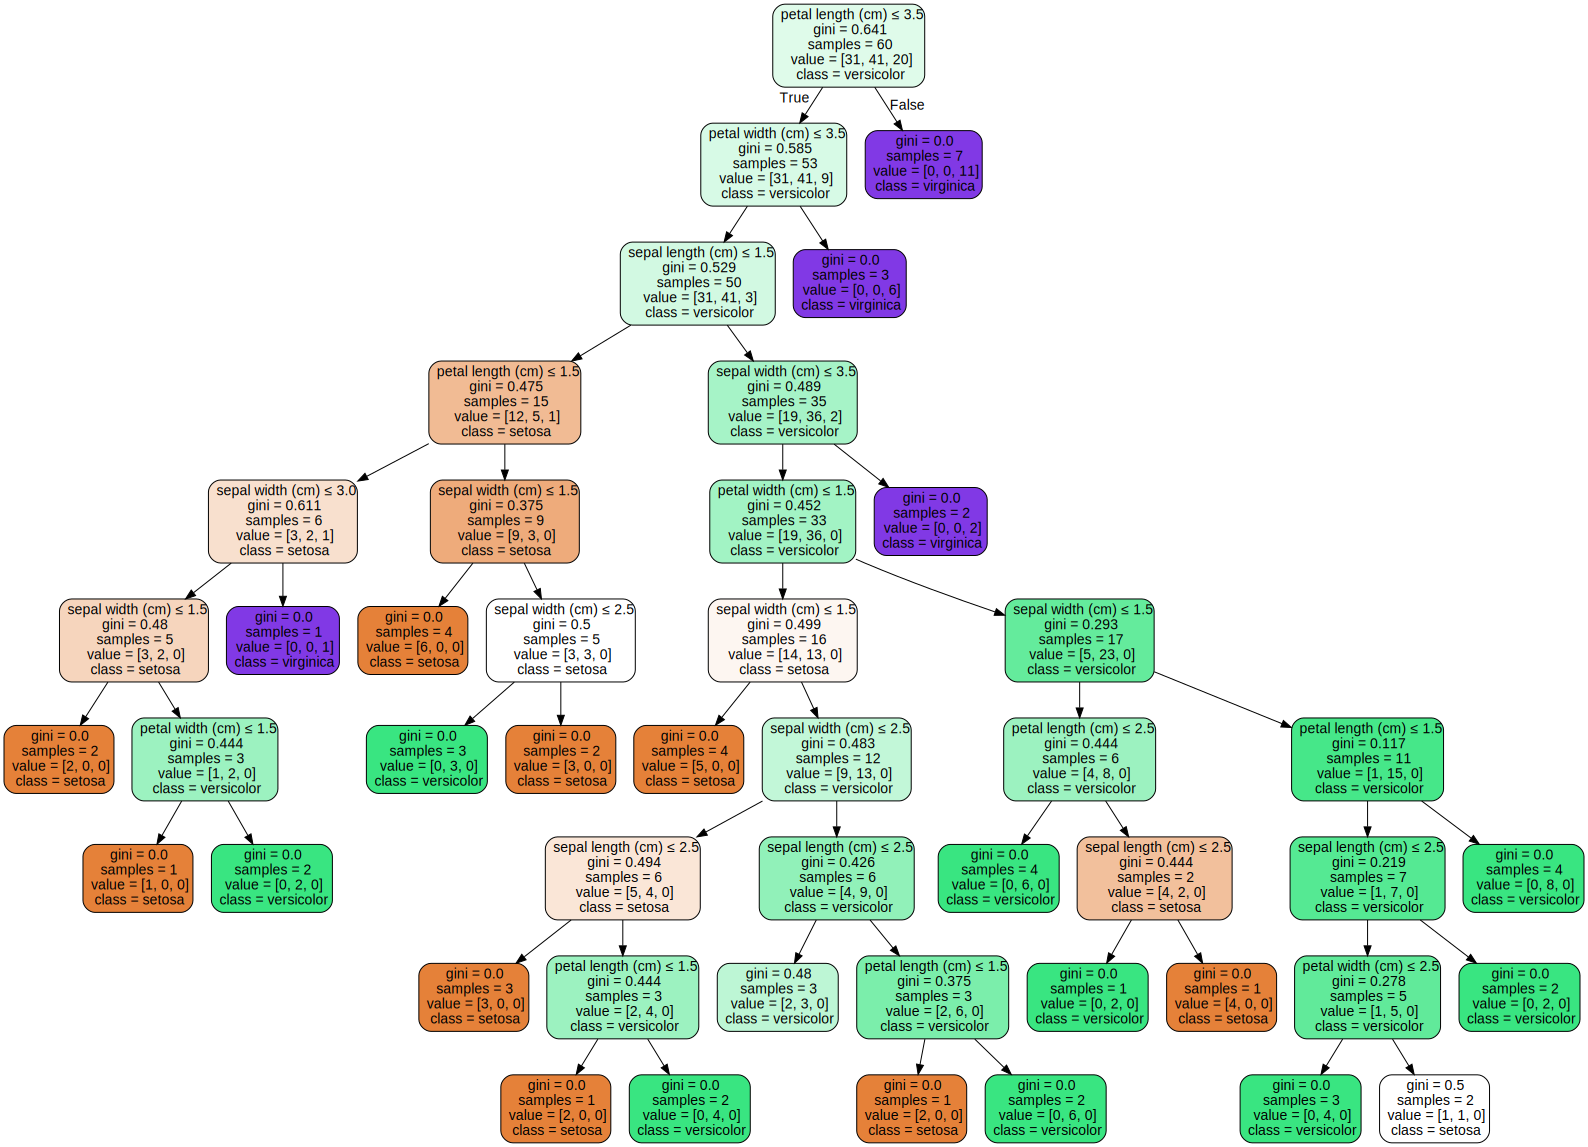

In [9]:
print('Total RF Estimators - ', len(rf.estimators_))
dot_data = tree.export_graphviz(rf.estimators_[0], out_file=None, feature_names=skdata.feature_names,
                                class_names=skdata.target_names, filled=True, rounded=True, special_characters=True)
# dot_data = tree.export_graphviz(rf.estimators_[0], out_file=None, filled=True, rounded=True, special_characters=True)
graph = graphviz.Source(dot_data)
graph